## 1. Data Preparation

##### a. Load the Data

In [5]:
import sys
import os

# Append the scripts directory to the system path
sys.path.append('/home/semre/telecom_user_behaviour_analysis/scripts')

# Change the current working directory to the appropriate path
os.chdir('/home/semre/telecom_user_behaviour_analysis')

# Import the required functions and modules
from src.utils import missing_values_table
from data_loader import load_data_from_db

# Call the function to load data
query = "SELECT * FROM public.xdr_data"
df = load_data_from_db(query)

# Display the first few rows of the DataFrame
df.head()

Host: localhost, Port: 5432, DB: telecom_db, User: postgres


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
missing_values_df = missing_values_table(df)
print("Missing Values in df:")
print(missing_values_df)

AttributeError: 'DataFrame' object has no attribute 'isnul'

#### b. Data Cleaning

In [3]:
# Select only numeric columns for calculating the mean
numeric_cols = df.select_dtypes(include=['number']).columns

# Replace missing values in numeric columns with the mean of those columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# For non-numeric columns, you may need to handle missing values differently.
# For example, you could fill NaNs with a placeholder like 'Unknown' or use a different strategy.
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
df[non_numeric_cols] = df[non_numeric_cols].fillna('Unknown')

## 2. User Handset Analysis

#### a. Identify Top 10 Handsets

In [5]:
# Check the column names in the DataFrame
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [7]:
top_handsets = df['Handset Type'].value_counts().head(10)
print("Top 10 handsets based on Handset Type:")
print(top_handsets)

Top 10 handsets based on Handset Type:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


#### b. Identify Top 3 Handset Manufacturers

In [10]:
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print("Top 3 handset manufacturers:")
print(top_manufacturers)


Top 3 handset manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


#### c. Identify Top 5 Handsets per Top 3 Manufacturers

In [12]:
# Step 1: Identify the Top 3 Manufacturers
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index
print("Top 3 Manufacturers:")
print(top_manufacturers)

# Step 2: Filter Data for Top 3 Manufacturers
filtered_df = df[df['Handset Manufacturer'].isin(top_manufacturers)]

# Step 3: Identify Top 5 Handsets for Each Manufacturer
top_handsets_per_manufacturer = {}
for manufacturer in top_manufacturers:
    manufacturer_data = filtered_df[filtered_df['Handset Manufacturer'] == manufacturer]
    top_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    top_handsets_per_manufacturer[manufacturer] = top_handsets

# Display Results
for manufacturer, handsets in top_handsets_per_manufacturer.items():
    print(f"\nTop 5 Handsets for {manufacturer}:")
    print(handsets)

Top 3 Manufacturers:
Index(['Apple', 'Samsung', 'Huawei'], dtype='object', name='Handset Manufacturer')

Top 5 Handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


#### 3. Behavior on Applications

In [14]:
# Group by 'MSISDN/Number' and aggregate data
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Counting the number of sessions (or occurrences)
    'Dur. (ms)': 'sum',  # Summing up session duration
    'HTTP DL (Bytes)': 'sum',  # Summing up download data
    'HTTP UL (Bytes)': 'sum',  # Summing up upload data
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum'
}).reset_index()

print("Aggregated User Behavior:")
print(user_behavior.head())

Aggregated User Behavior:
   MSISDN/Number  Bearer Id  Dur. (ms)  HTTP DL (Bytes)  HTTP UL (Bytes)  \
0   3.360100e+10          1   116720.0     1.144710e+08     3.242301e+06   
1   3.360100e+10          1   181230.0     1.144710e+08     3.242301e+06   
2   3.360100e+10          1   134969.0     1.144710e+08     3.242301e+06   
3   3.360101e+10          1    49878.0     8.749000e+03     6.530000e+02   
4   3.360101e+10          2    37104.0     2.996791e+08     7.976119e+06   

   Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
0                2206504.0          3337123.0          837400.0   
1                2598548.0          4197697.0         2828821.0   
2                3148004.0          3343483.0         2436500.0   
3                 251469.0          5937765.0         2178618.0   
4                2861230.0         13728668.0         2247808.0   

   Youtube DL (Bytes)  Netflix DL (Bytes)  Gaming DL (Bytes)  Other DL (Bytes)  
0          14900201.0          10

## 4. Exploratory Data Analysis (EDA)

#### a. Non-Graphical Analysis

##### Group by MSISDN/Number and aggregate the data:

In [16]:
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Counting the number of sessions (or occurrences)
    'Dur. (ms)': 'sum',  # Summing up session duration
    'HTTP DL (Bytes)': 'sum',  # Summing up download data
    'HTTP UL (Bytes)': 'sum',  # Summing up upload data
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum'
}).reset_index()

##### Calculate deciles based on Dur. (ms) (session duration):

In [17]:
# Ensure 'Dur. (ms)' is the column used for session duration
user_behavior['decile_class'] = pd.qcut(user_behavior['Dur. (ms)'], 10, labels=False)

##### Aggregate data per decile class:

In [18]:
data_per_decile = user_behavior.groupby('decile_class').agg({
    'HTTP DL (Bytes)': 'sum',
    'HTTP UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum'
}).reset_index()

print("Data per Decile Class:")
print(data_per_decile)

Data per Decile Class:
   decile_class  HTTP DL (Bytes)  HTTP UL (Bytes)  Social Media DL (Bytes)  \
0             0     3.874064e+11     1.258731e+10             1.978229e+10   
1             1     5.935287e+11     1.826821e+10             2.206094e+10   
2             2     1.123908e+12     3.211362e+10             2.369099e+10   
3             3     2.528428e+12     6.686226e+10             2.176888e+10   
4             4     1.061076e+12     3.170471e+10             1.851481e+10   
5             5     1.297835e+12     3.771931e+10             2.316430e+10   
6             6     1.313368e+12     3.738729e+10             2.224763e+10   
7             7     2.381544e+12     6.442243e+10             2.860795e+10   
8             8     2.406773e+12     6.605749e+10             3.363577e+10   
9             9     4.076901e+12     1.192258e+11             5.582650e+10   

   Google DL (Bytes)  Email DL (Bytes)  Youtube DL (Bytes)  \
0       6.298603e+10      1.984219e+10        1.283557e+

#### b. Graphical Analysis

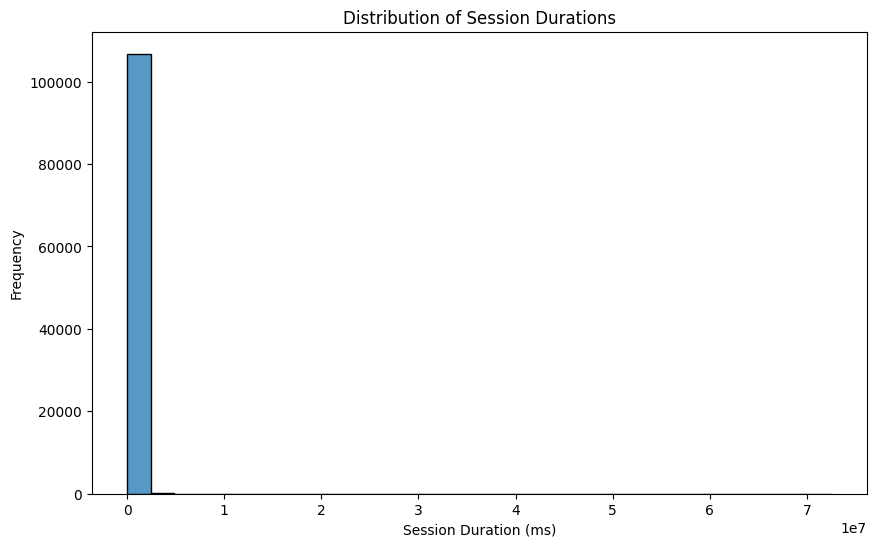

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of session durations
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['Dur. (ms)'], bins=30)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

#### c. Bivariate Analysis

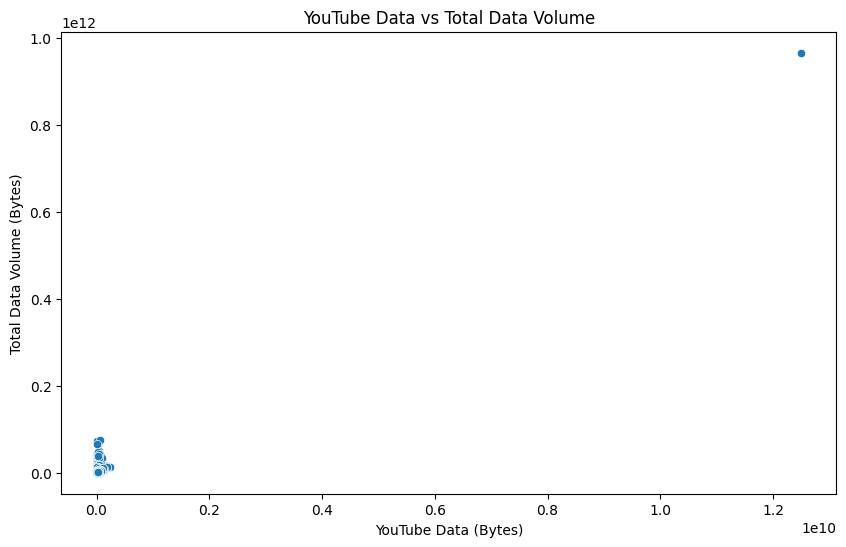

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatter plot of YouTube data vs Total data volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=user_behavior['Youtube DL (Bytes)'], 
                y=user_behavior['HTTP DL (Bytes)'] + user_behavior['Google DL (Bytes)'] + 
                  user_behavior['Email DL (Bytes)'] + user_behavior['Netflix DL (Bytes)'] + 
                  user_behavior['Gaming DL (Bytes)'] + user_behavior['Other DL (Bytes)'])
plt.title('YouTube Data vs Total Data Volume')
plt.xlabel('YouTube Data (Bytes)')
plt.ylabel('Total Data Volume (Bytes)')
plt.show()

#### d. Correlation Analysis

In [24]:
# Calculate the correlation matrix for the correct columns
correlation_matrix = user_behavior[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                                    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                                    'Other DL (Bytes)']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           0.960410   
Google DL (Bytes)                       0.960410           1.000000   
Email DL (Bytes)                        0.960932           0.959794   
Youtube DL (Bytes)                      0.961046           0.960102   
Netflix DL (Bytes)                      0.960543           0.959418   
Gaming DL (Bytes)                       0.961087           0.960025   
Other DL (Bytes)                        0.960380           0.959308   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.960932            0.961046   
Google DL (Bytes)                0.959794            0.960102   
Email DL (Bytes)                 1.000000            0.960537   
Youtube DL (Bytes)               0.960537            1.000000   
Netflix DL (Bytes)               0.959728            0.960288   
Gaming DL (Bytes)    

#### e. Dimensionality Reduction

In [28]:
# Inspect the columns in the DataFrame
print(user_behavior.columns)

Index(['MSISDN/Number', 'Bearer Id', 'Dur. (ms)', 'HTTP DL (Bytes)',
       'HTTP UL (Bytes)', 'Social Media DL (Bytes)', 'Google DL (Bytes)',
       'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)',
       'Gaming DL (Bytes)', 'Other DL (Bytes)', 'decile_class'],
      dtype='object')


In [29]:
from sklearn.decomposition import PCA

# Specify the correct features for PCA
features = user_behavior[['Dur. (ms)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 
                          'Social Media DL (Bytes)', 'Google DL (Bytes)', 
                          'Email DL (Bytes)', 'Youtube DL (Bytes)', 
                          'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                          'Other DL (Bytes)']]

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

correlation_matrix = user_behavior[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
                                    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 
                                    'Other DL (Bytes)']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                         Social Media DL (Bytes)  Google DL (Bytes)  \
Social Media DL (Bytes)                 1.000000           0.960410   
Google DL (Bytes)                       0.960410           1.000000   
Email DL (Bytes)                        0.960932           0.959794   
Youtube DL (Bytes)                      0.961046           0.960102   
Netflix DL (Bytes)                      0.960543           0.959418   
Gaming DL (Bytes)                       0.961087           0.960025   
Other DL (Bytes)                        0.960380           0.959308   

                         Email DL (Bytes)  Youtube DL (Bytes)  \
Social Media DL (Bytes)          0.960932            0.961046   
Google DL (Bytes)                0.959794            0.960102   
Email DL (Bytes)                 1.000000            0.960537   
Youtube DL (Bytes)               0.960537            1.000000   
Netflix DL (Bytes)               0.959728            0.960288   
Gaming DL (Bytes)    